# Gradient Descent Implementation
We will display the details of the implementation of gradient descents with PyTorch. For the mechanism of `torch.autograd`, please refer to `autograd.ipynb`.

Consider a simple regression model in which 
- `x`: input
- `y`: target
- `w`: weight 
- `b`: bias

## 1-dimension model

In [1]:
import torch

x = torch.tensor(0.5)
y = torch.tensor(3.0) # target, or label

# Optimize the weight and bias -> requires_grad=True
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.3,requires_grad=True)

In [2]:
# Model
def model(x,w,b):
    return w * x + b
y_pred = model(x,w,b)
y_pred

tensor(0.8000, grad_fn=<AddBackward0>)

## Set seed

In [3]:
def same_seed(seed):
    torch.manual_seed(seed)
same_seed(2023)

## Loss function

In [4]:
def loss(y_pred):
    return (y_pred-y)**2

In [5]:
L = loss(y_pred)
print(L)

tensor(4.8400, grad_fn=<PowBackward0>)


### .backward()
Denote the loss function by $L$. Now we use `.backward()` to calculate the gradient $\frac{\partial}{\partial w}L$ and $\frac{\partial}{\partial b}L$.

In [6]:
L.backward()
print('gradient with respect to w:',w.grad)
print('gradient with respect to b:',b.grad)

gradient with respect to w: tensor(-2.2000)
gradient with respect to b: tensor(-4.4000)


In [7]:
# Create a list to record the loss
loss_history = []
loss_history.append(L)
# hyperparameter
accuracy = 0.5
learning_rate = 0.01

Note that you have to use `torch.no_grad()` to disable the gradient calculation.

In [8]:
with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad
    print('w after one update:',w)
    print('b after one update:',b)

w after one update: tensor(1.0220, requires_grad=True)
b after one update: tensor(0.3440, requires_grad=True)


### .grad.zero_()
Before your next update, use `w.grad.zero_()` and `b.grad.zero_()` to clear the gradients.

In [9]:
w.grad.zero_() 
b.grad.zero_()
print('gradients of w after .zero_():',w.grad)
print('gradients of b after .zero_():',b.grad)

gradients of w after .zero_(): tensor(0.)
gradients of b after .zero_(): tensor(0.)


In [10]:
print('Parameters after one update')
print('w:',w)
print('b:',b)

Parameters after one update
w: tensor(1.0220, requires_grad=True)
b: tensor(0.3440, requires_grad=True)


### Training loop
Together with for loop, we can optimize our model up to any acuracy.

In [11]:
while L >= accuracy:
    y_pred = model(x,w,b)
    L = loss(y_pred)
    loss_history.append(L)
    
    L.backward()

    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    w.grad.zero_() 
    b.grad.zero_()
    print('Parameters after one update')
    print('w:',w)
    print('b:',b)

Parameters after one update
w: tensor(1.0434, requires_grad=True)
b: tensor(0.3869, requires_grad=True)
Parameters after one update
w: tensor(1.0644, requires_grad=True)
b: tensor(0.4287, requires_grad=True)
Parameters after one update
w: tensor(1.0848, requires_grad=True)
b: tensor(0.4695, requires_grad=True)
Parameters after one update
w: tensor(1.1046, requires_grad=True)
b: tensor(0.5093, requires_grad=True)
Parameters after one update
w: tensor(1.1240, requires_grad=True)
b: tensor(0.5480, requires_grad=True)
Parameters after one update
w: tensor(1.1429, requires_grad=True)
b: tensor(0.5858, requires_grad=True)
Parameters after one update
w: tensor(1.1613, requires_grad=True)
b: tensor(0.6227, requires_grad=True)
Parameters after one update
w: tensor(1.1793, requires_grad=True)
b: tensor(0.6586, requires_grad=True)
Parameters after one update
w: tensor(1.1968, requires_grad=True)
b: tensor(0.6937, requires_grad=True)
Parameters after one update
w: tensor(1.2139, requires_grad=True

In [12]:
print(loss_history[-1])

tensor(0.4957, grad_fn=<PowBackward0>)


## multi-dimension model 
Now we consider vector-valued input `X`, label `Y` and bias `B` with weight matrix `W`.

In [13]:
X = torch.tensor((0.2,0.5,0.1,3))
Y = torch.tensor((1,2,3,4))
W = torch.rand((4,4),requires_grad=True)
B = torch.rand(4,requires_grad=True)

In [14]:
X

tensor([0.2000, 0.5000, 0.1000, 3.0000])

In [15]:
W

tensor([[0.4290, 0.7201, 0.9481, 0.4797],
        [0.5414, 0.9906, 0.4086, 0.2183],
        [0.1834, 0.2852, 0.7813, 0.1048],
        [0.6550, 0.8375, 0.1823, 0.5239]], requires_grad=True)

In [16]:
B

tensor([0.2432, 0.9644, 0.5034, 0.0320], requires_grad=True)

### Model

In [17]:
def model(X,W,B):
    return torch.matmul(W,X)+B
Y_pred = model(X,W,B)
Y_pred

tensor([2.2228, 2.2638, 1.0752, 2.1717], grad_fn=<AddBackward0>)

### Loss and float tensor
We use `MSELoss` to be our loss. Note that the input of `nn.MSELoss()` should be float tensor.

In [18]:
loss = torch.nn.MSELoss()
Loss_history = []

Y_pred = Y_pred.to(torch.float32)
Y = Y.to(torch.float32)

L = loss(Y_pred,Y)
Loss_history.append(L)

print(L)

tensor(2.1531, grad_fn=<MseLossBackward0>)


### .backward()

In [19]:
L.backward()
print('gradient with respect to W:')
print(W.grad)
print('gradient with respect to B:')
print(B.grad)

gradient with respect to W:
tensor([[ 0.1223,  0.3057,  0.0611,  1.8342],
        [ 0.0264,  0.0660,  0.0132,  0.3957],
        [-0.1925, -0.4812, -0.0962, -2.8872],
        [-0.1828, -0.4571, -0.0914, -2.7425]])
gradient with respect to B:
tensor([ 0.6114,  0.1319, -0.9624, -0.9142])


### .grad.zero_()

In [20]:
W.grad.zero_() 
B.grad.zero_()
print('gradients of W after .zero_():')
print(W.grad)
print('gradients of B after .zero_():')
print(B.grad)

gradients of W after .zero_():
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
gradients of B after .zero_():
tensor([0., 0., 0., 0.])


### Training loop

In [21]:
while L >= accuracy:
    Y_pred = model(X,W,B)
    Y_pred = Y_pred.to(torch.float32)
    L = loss(Y_pred,Y)
    Loss_history.append(L)
    
    L.backward()

    with torch.no_grad():
        W -= learning_rate * W.grad
        B -= learning_rate * B.grad
    W.grad.zero_() 
    B.grad.zero_()
    print('Parameters after one update')
    print('W matrix')
    print(W)
    print('B')
    print(B)

Parameters after one update
W matrix
tensor([[0.4278, 0.7170, 0.9475, 0.4613],
        [0.5411, 0.9899, 0.4085, 0.2144],
        [0.1853, 0.2900, 0.7822, 0.1337],
        [0.6568, 0.8421, 0.1832, 0.5513]], requires_grad=True)
B
tensor([0.2370, 0.9631, 0.5130, 0.0412], requires_grad=True)
Parameters after one update
W matrix
tensor([[0.4266, 0.7141, 0.9470, 0.4439],
        [0.5409, 0.9893, 0.4083, 0.2106],
        [0.1871, 0.2946, 0.7831, 0.1611],
        [0.6585, 0.8464, 0.1841, 0.5773]], requires_grad=True)
B
tensor([0.2312, 0.9619, 0.5222, 0.0499], requires_grad=True)
Parameters after one update
W matrix
tensor([[0.4255, 0.7114, 0.9464, 0.4274],
        [0.5406, 0.9887, 0.4082, 0.2070],
        [0.1888, 0.2989, 0.7840, 0.1870],
        [0.6602, 0.8505, 0.1849, 0.6020]], requires_grad=True)
B
tensor([0.2257, 0.9607, 0.5308, 0.0581], requires_grad=True)
Parameters after one update
W matrix
tensor([[0.4245, 0.7087, 0.9459, 0.4118],
        [0.5404, 0.9881, 0.4081, 0.2037],
        [0.1

In [22]:
print(loss_history[-1])

tensor(0.4957, grad_fn=<PowBackward0>)


## Neural network
Now we implement the gradient descent on a neural network. We use a simple MLP model to conduct a regression task. 

We use `sklearn.datasets.make_regression` to randomly generate a regression problem. `X` is a $100\times 3$ matrix where each row is a sample. `y` is a $100\times 1$ lable matrix.

In [23]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=3, noise=1, random_state=42)

Again, we need to cast `X`, `y` to float Tensor.

In [24]:
X = torch.tensor(X)
X.dtype

torch.float64

In [25]:
X = X.float()
X.dtype

torch.float32

In [26]:
y = torch.tensor(y).float()
y.dtype

torch.float32

In [27]:
config = {
    'in_features':3,
    'lr':0.01,
    'n_epoch':100
}

### Model

In [28]:
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(config['in_features'],2),
            nn.ReLU(),
            nn.Linear(2,1)
        )
    def forward(self,x):
        x = self.layers(x)
        return x

model = MLP()

### Training loop
For neural networks, we can use `optimizer` to update our model parameters. It is worth noting that we no longer set the condition `while loss >= accuracy` when optimizing our neural network since we cannot expect how long it takes our model to reduce the loss or even we don't know whether the convergence of neural network is guaranteed, given model hyperparatmeter.

With optimizer, we don't we to update parameters manually. All operation is packed in `optimizer.step()`.

In [29]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=config['lr']) 

Also note that we have to enter training mode before our training loop.

In [30]:
model.train()

MLP(
  (layers): Sequential(
    (0): Linear(in_features=3, out_features=2, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2, out_features=1, bias=True)
  )
)

In [33]:
for epoch in range(config['n_epoch']):
    y_pred = model(X)
    L = criterion(y_pred,y)

    # calculate partial derivatives
    L.backward()
    optimizer.step()

    # zero gradients
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {L.item():.4f}')

epoch: 10, loss = 6868.1567
epoch: 20, loss = 6868.1465
epoch: 30, loss = 6868.1382
epoch: 40, loss = 6868.1318
epoch: 50, loss = 6868.1274
epoch: 60, loss = 6868.1226
epoch: 70, loss = 6868.1182
epoch: 80, loss = 6868.1138
epoch: 90, loss = 6868.1104
epoch: 100, loss = 6868.1074


/Users/lerong/miniconda3/envs/general_env/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


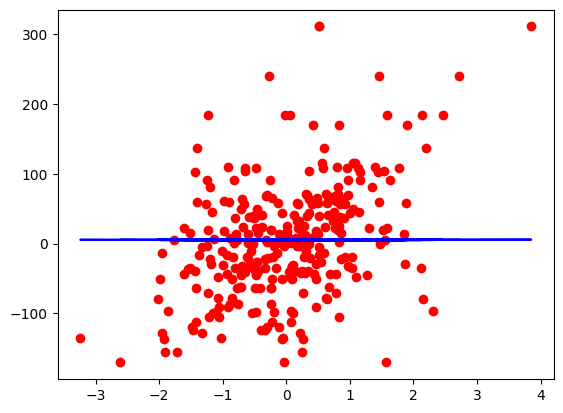

In [34]:
import matplotlib.pyplot as plt
predicted = model(X).detach().numpy()

plt.plot(X, y, 'ro')
plt.plot(X, predicted, 'b')
plt.show()

This notebook contains the implementation tips and details of gradient descent at which I was confused at the first glance. Hope this helps.